In [1]:
from sympy import *
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as cs

# EJERCICIO 2
## $c)$

Del desarrollo que se encuentra en el PDF para el inciso $c)$, se obtuvo que el parámetro de impacto para el cual se obtiene una órbita elíptica con excentricidad $e=0.5$, está dado en términos de la velocidad $v$:

$$ b = \pm \sqrt{\dfrac{1}{v^2 \left[ \left(-1.182794\times 10^{-42} \frac{s^4}{m^6}\right) v^2 + \left(2.093016 \times 10^{-35} \frac{s^2}{m^4}\right) \right]}}$$

donde las velocidades que cumplen esta condición, son las que se encuentran dentro del rango de valores

$$ -4206.5413 < v < 0\,  \wedge 0 < v < 4206.5413 $$

Así, sean $c_1 = -1.182864\times 10^{-42} \frac{s^4}{m^6}$ y $c_2 = 2.093077 \times 10^{-35} \frac{s^2}{m^4}$

In [2]:
c1 = -1.182864e-42

c2 = 2.093077e-35

donde en el PDF ya se calcularon $k, \mu, r$, tales que

In [3]:
k = 3.9583006e51

mu = 3.728268e30

r = 1.2e14

Queremos obtener la excentricidad $e$ (para comprobar que en efecto sea $e=0.5$) tal que

$$ e = \sqrt{1 +\dfrac{E}{|E_{min}|}}$$

donde 

$$E = \dfrac{1}{2} \mu v^2 - \dfrac{k}{r}$$

y

$$ E_{min} = \dfrac{-k}{2r_c}$$

con

$$r_c = \dfrac{\ell^2}{\mu k}$$

y

$$\ell = \mu v b$$

Con la siguiente función, se pueden probar los valores para los cuales la velocidad satisface la condición de que la excentricidad sea igual a $e=0.5$

In [4]:
def eOriginal(v):
    """
    Los valores de v, a pesar de tener solución matemática en
    -4206.5413 < v < 0\,  \wedge 0 < v < 4206.5413
    Sin embargo, por cuestión de decimales, el código no devuelve una excentricidad de 0.5
    si se añaden más decimales ya sea a 4206.5423 como a -4206.5423
    """
    bpOriginal = 1/(np.sqrt(v**2*(c1*v**2 + c2)))
    bnOriginal = -1/(np.sqrt(v**2*(c1*v**2 + c2)))
    ellPosOriginal = mu*v*bpOriginal
    ellNegOriginal = mu*v*bnOriginal
    rcPosOriginal = (ellPosOriginal**2)/(mu*k)
    rcNegOriginal = (ellNegOriginal**2)/(mu*k)
    Eg = 0.5*mu*v**2 - k/r
    EminPosOriginal = -(k)/(2*rcPosOriginal)
    EminNegOriginal = -(k)/(2*rcNegOriginal)
    excPosOriginal = np.sqrt(1+(Eg)/(np.abs(EminPosOriginal)))
    excNegOriginal = np.sqrt(1+(Eg)/(np.abs(EminNegOriginal)))
    return excPosOriginal, excNegOriginal, Eg, EminPosOriginal, EminNegOriginal, bpOriginal, bnOriginal, rcPosOriginal, rcNegOriginal

vPruebaOriginal = eOriginal(-4206.5)
print(f'Los valores de la excentricidad positiva, negativa, E, E_min+, E_min-, b+,  b-, r_c+ y r_c- son: {vPruebaOriginal}')

Los valores de la excentricidad positiva, negativa, E, E_min+, E_min-, b+,  b-, r_c+ y r_c- son: (0.4993473551227585, 0.4993473551227585, -6.540972718333504e+32, -8.713719287529153e+32, -8.713719287529153e+32, 1.1673942152320274e+16, -1.1673942152320274e+16, 2.2713037162357386e+18, 2.2713037162357386e+18)


### Ecuación de la órbita

Tenemos que la ecuación de la órbita está dada por

$$ r(\theta) = \dfrac{\mu }{ k \left(1 + e \cos{\theta}\right) \left[ \left(-1.182794\times 10^{-42} \frac{s^4}{m^6}\right) v^2 + \left(2.093016 \times 10^{-35} \frac{s^2}{m^4}\right) \right]}$$

donde 

$$c_1 = -1.182864\times 10^{-42} \frac{s^4}{m^6}, \quad c_2 = 2.093077 \times 10^{-35} \frac{s^2}{m^4}$$

A continuación, se definen todas las funciones necesarias para comprobar los valores que componen a cada variable de la ecuación de la órbita

In [5]:
def E(velocidad):
    return 0.5*mu*velocidad**2 - k/r

def b(velocidad):
    return 1/(np.sqrt(velocidad**2*(c1*velocidad**2 + c2)))

def bRaices(velocidad):
    bp = b(velocidad)
    bn = -b(velocidad)
    return bp, bn

def Emin(velocidad):
    l = mu*velocidad*b(velocidad)
    rc = (l**2)/(mu*k)
    return -(k)/(2*rc)

def excentricidad(velocidad):
    return np.sqrt(1 + (E(velocidad))/(np.abs(Emin(velocidad))))

In [6]:
def rtheta(Theta, velocidad):
    ke = k*(1+(excentricidad(velocidad))*np.cos(Theta))
    sumv = c1*velocidad**2 + c2
    return (mu)/(ke)*(sumv)

rtheta=np.vectorize(rtheta)

#Se puede proporcionar un ángulo específico para ver el valor de la r(theta)

angle = 0

#Se comienzan a definir las velocidades con las cuales se graficará la ecuación de la órbita

vel = -4200

vel2 = -100

vel3 = 500

vel4= 3300

# Resumen de todas las variables necesarias para poder obtener la ecuación de la órbita

print(f'Para una velocidad de {vel} m/s y un ángulo de {angle} tenemos una r de {rtheta(angle, vel)}')
print(f'El momento angular es {mu*vel*b(vel)}')
print(f'El radio crítico es {((mu*vel*b(vel))**2)/(mu*k)}')
print(f'El parámetro de impacto asociado es {bRaices(vel)[0]} o {bRaices(vel)[1]}')
print(f'La energía E es {E(vel)} J, y la energía mínima es: {Emin(vel)}')
print(f'La excentricidad es {excentricidad(vel)}')

Para una velocidad de -4200 m/s y un ángulo de 0 tenemos una r de 4.084599668246563e-59
El momento angular es -1.4617956914953713e+49
El radio crítico es 1.4479629837437002e+16
El parámetro de impacto asociado es 933534266348834.5 o -933534266348834.5
La energía E es -1.0251457333333518e+35 J, y la energía mínima es: -1.3668514473228576e+35
La excentricidad es 0.49999477055198494


### Gráficos

Se añaden los gráficos de la ecuación de la órbita para las velocidades definidas previamente, y un conjunto de valores de $\theta$

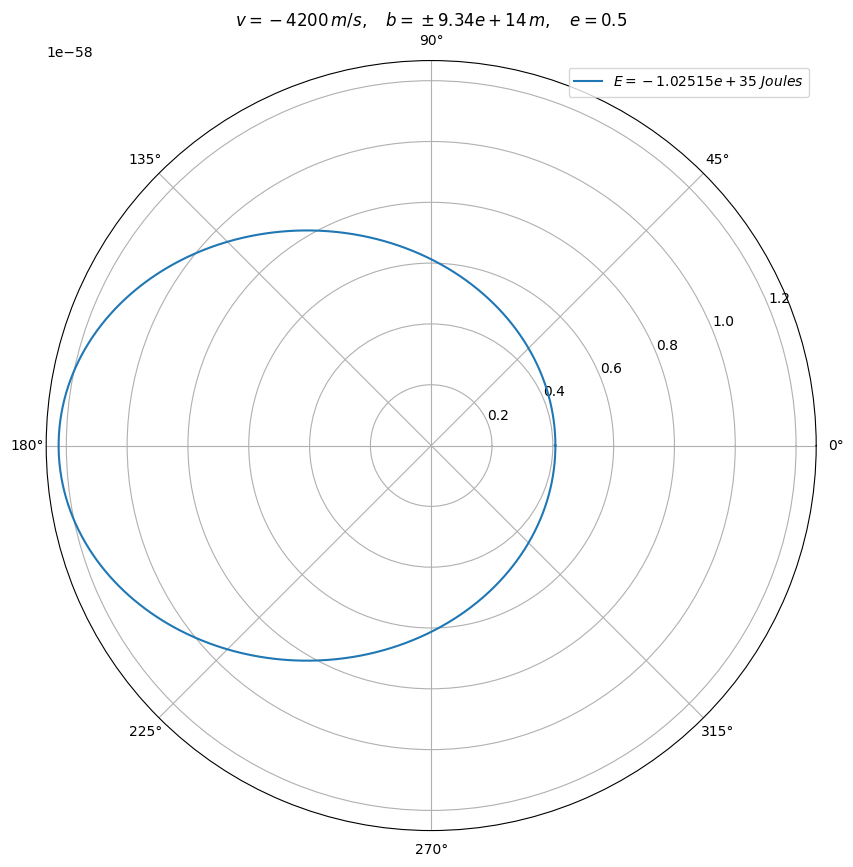

In [7]:
theta = np.linspace(0,2*np.pi,1000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta,rtheta(theta,vel),label='$E={:2.5e}$ $Joules$'.format(E(vel)))
plt.title('$v={}\, m/s, \quad b=\pm{:2.2e} \,m, \quad e={:2.2}$'.format(vel, bRaices(vel)[0], excentricidad(vel)))
plt.legend()
plt.show()

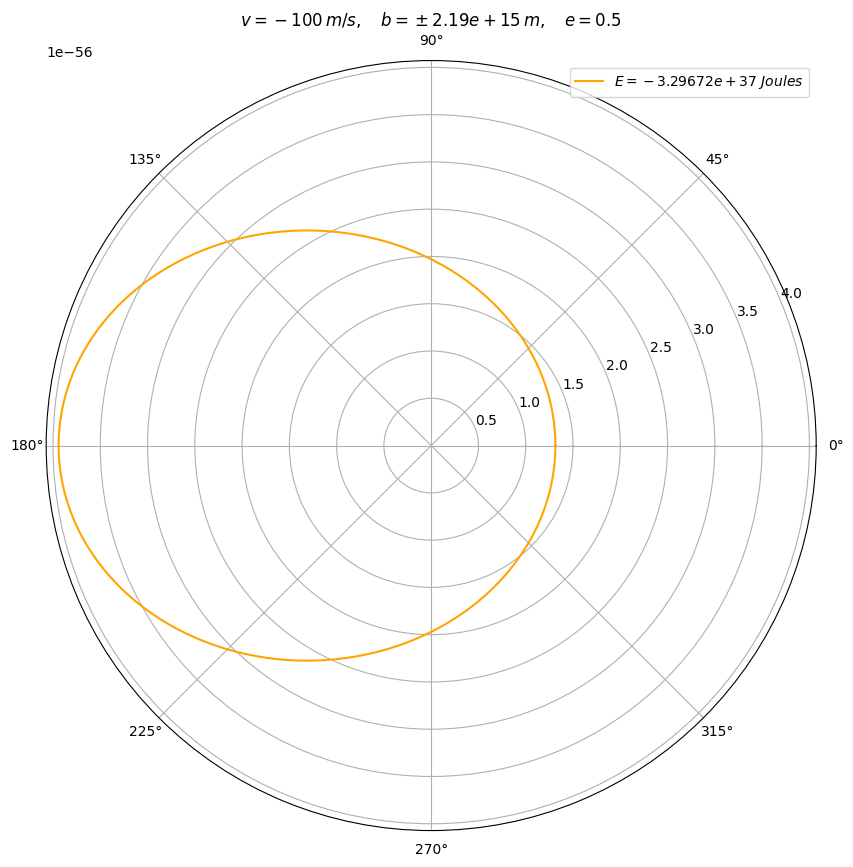

In [8]:
theta = np.linspace(0,2*np.pi,1000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta,rtheta(theta,vel2), c='orange', label='$E={:2.5e}$ $Joules$'.format(E(vel2)))
plt.title('$v={}\, m/s, \quad b=\pm{:2.2e} \,m, \quad e={:2.2}$'.format(vel2, bRaices(vel2)[0], excentricidad(vel2)))
plt.legend()
plt.show()

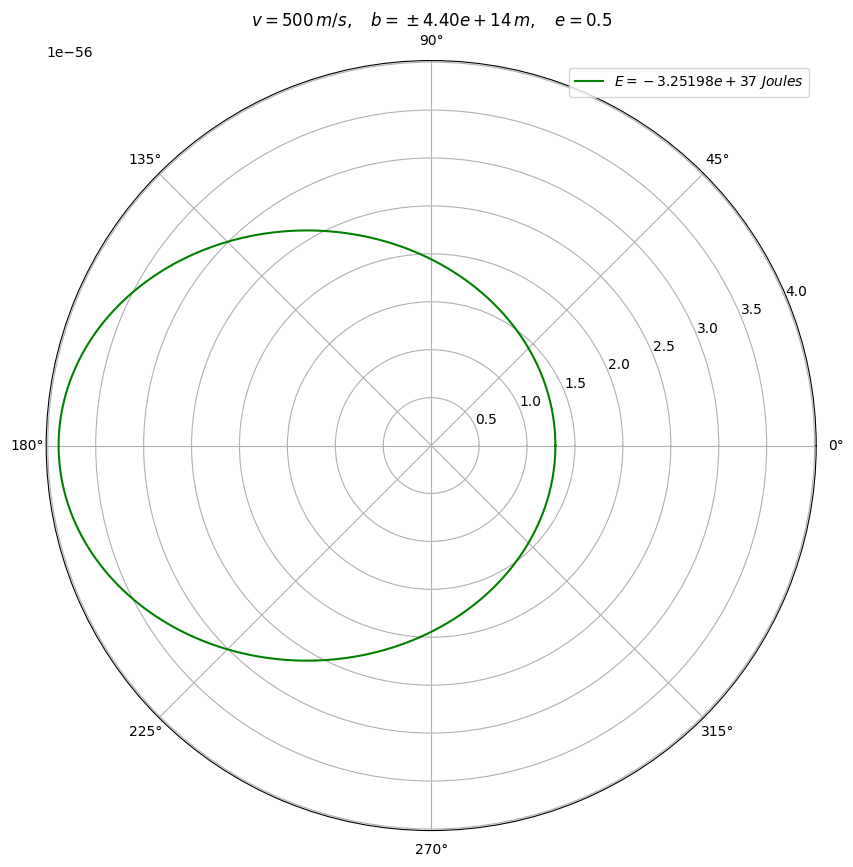

In [9]:
theta = np.linspace(0,2*np.pi,1000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta,rtheta(theta,vel3), c='green', label='$E={:2.5e}$ $Joules$'.format(E(vel3)))
plt.title('$v={}\, m/s, \quad b=\pm{:2.2e} \,m, \quad e={:2.2}$'.format(vel3, bRaices(vel3)[0], excentricidad(vel3)))
plt.legend()
plt.show()

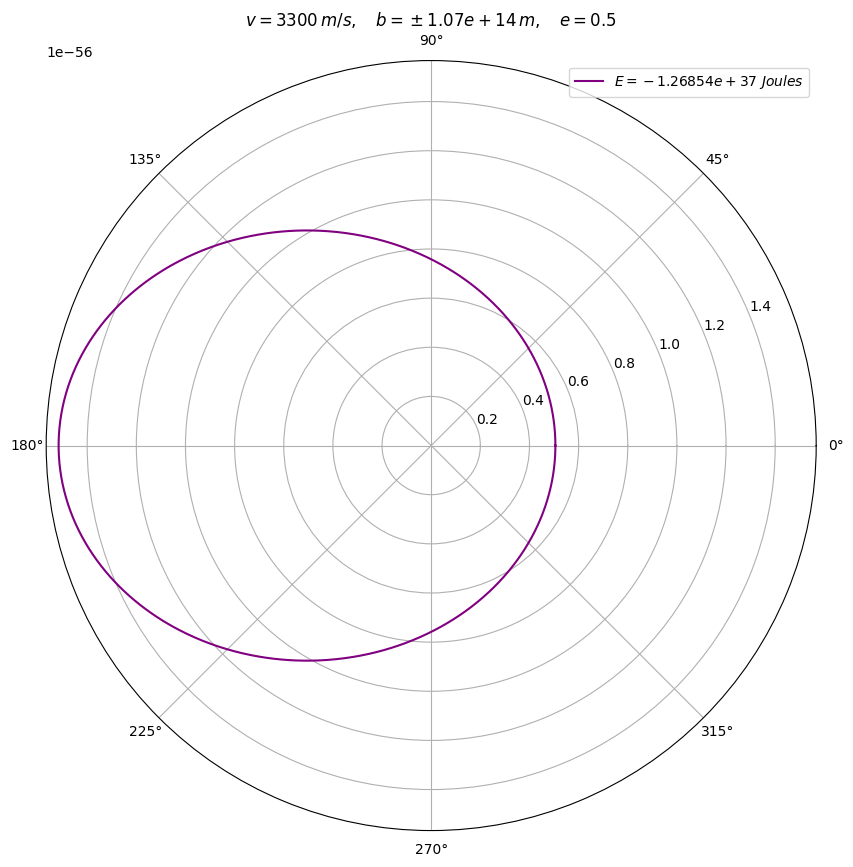

In [10]:
theta = np.linspace(0,2*np.pi,1000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta,rtheta(theta,vel4), c='purple', label='$E={:2.5e}$ $Joules$'.format(E(vel4)))
plt.title('$v={}\, m/s, \quad b=\pm{:2.2e} \,m, \quad e={:2.2}$'.format(vel4, bRaices(vel4)[0], excentricidad(vel4)))
plt.legend()
plt.show()

#### Los gráficos realizados previamente en una misma imagen

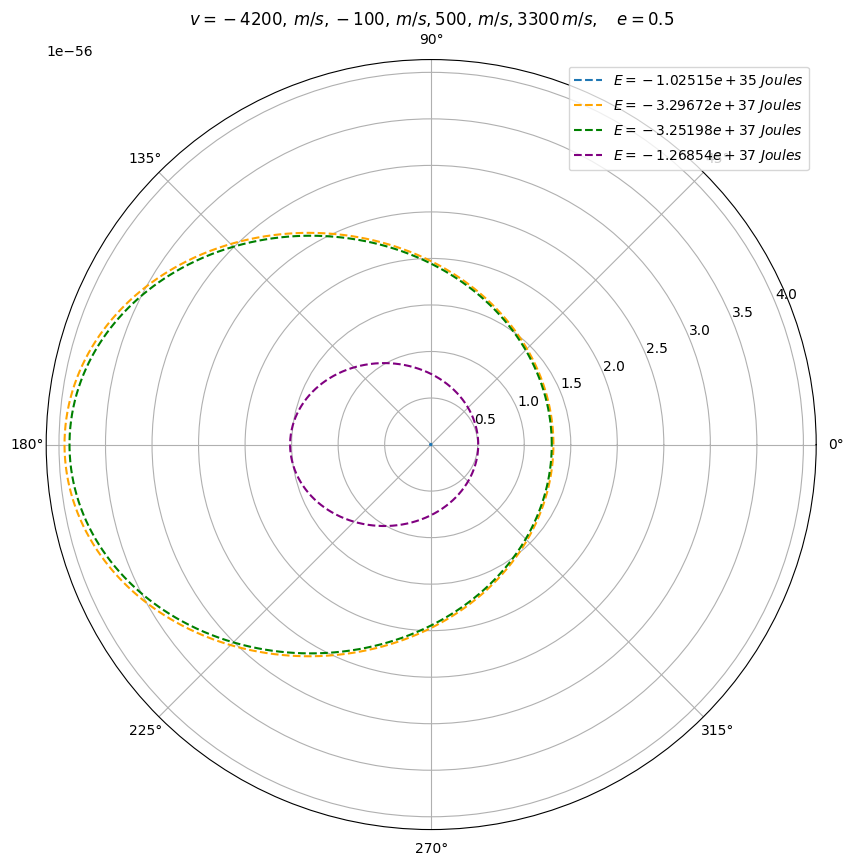

In [11]:
theta = np.linspace(0,2*np.pi,1000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta,rtheta(theta,vel), '--', label='$E={:2.5e}$ $Joules$'.format(E(vel)))
ax.plot(theta,rtheta(theta,vel2), '--', c='orange', label='$E={:2.5e}$ $Joules$'.format(E(vel2)))
ax.plot(theta,rtheta(theta,vel3), '--', c='green', label='$E={:2.5e}$ $Joules$'.format(E(vel3)))
ax.plot(theta,rtheta(theta,vel4), '--', c='purple', label='$E={:2.5e}$ $Joules$'.format(E(vel4)))
plt.title('$v={},\, m/s,{},\, m/s,{},\, m/s,{}\, m/s, \quad e={:2.2}$'.format(vel, vel2, vel3, vel4, excentricidad(vel)))
plt.legend()
plt.show()